<a href="https://colab.research.google.com/github/AndrewKorn/mat_stat_task/blob/main/MatStatTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Первое задание

In [1]:
!pip install ipympl # uncomment at first launch

In [36]:
from google.colab import output
output.enable_custom_widget_manager()

In [2]:
import math
import numpy as np
from scipy.stats import norm, kstwobign
from scipy.stats.distributions import chi2, t, f

In [3]:
data = [-1.439, -1.609, -3.889, -1.735, -3.096, 0.023, -1.414, -2.312, -2.648, -2.038,
        -2.631, -2.233, -1.908, -2.356, -2.107, -2.949, -3.048, -2.019, -1.652, -2.285,
        -2.446, -1.752, -1.990, -1.689, -1.552, -1.916, -2.036, -1.888, -0.726, -2.874,
        -1.426, -1.432, -1.419, -2.090, -2.698, -2.494, -2.544, -2.825, -2.951, -1.814,
        -3.014, -2.542, -2.912, -2.291, -2.103, -1.966, -0.769, -2.474, -1.987, -1.459]

In [4]:
data = np.array(data)
mean = data.mean()

In [5]:
mean

-2.1084799999999997

In [6]:
S_2 = ((data - mean)**2).mean()

In [7]:
S_2

0.46735336959999996

## a) для $α$, если $σ^2$ известно(0.7)

$\bar{x}$ ~ $N(α, \frac{σ^2}{n})$

$G(\overrightarrow{x}, α)$ = $\frac{\bar{x} - α}{\sqrt{\frac{\sigma^2}{n}}}$ ~ N(0, 1)

$P(t_1 \leq \frac{\bar{x} - α}{\sqrt{\frac{\sigma^2}{n}}} \leq t_2) = 1-𝛆$

$Φ(t_1) = \frac{𝛆}{2}$

$Φ(t_2) = 1 - \frac{𝛆}{2}$

$P(\bar{x} - \frac{\sigma t_2}{\sqrt{n}} \leq α \leq \bar{x} + \frac{\sigma t_2}{\sqrt{n}}) = 1 - 𝛆$

In [8]:
def confidenceInterval(eps):
  sigma = math.sqrt(0.7)
  n = 50
  t2 = norm.ppf(1 - eps / 2)

  sigma_minus = mean - sigma*t2/math.sqrt(n)
  sigma_plus = mean + sigma*t2/math.sqrt(n)
  print("Доверительный интервал уровня ", 1 - eps)
  print('(', sigma_minus , ',', sigma_plus, ')')

In [9]:
confidenceInterval(0.01)

Доверительный интервал уровня  0.99
( -2.413256233348824 , -1.8037037666511755 )


In [10]:
confidenceInterval(0.05)

Доверительный интервал уровня  0.95
( -2.340386066090815 , -1.876573933909184 )


In [11]:
confidenceInterval(0.1)

Доверительный интервал уровня  0.9
( -2.3031017057713132 , -1.9138582942286861 )


##б)для $α$, если $σ^2$ неизвестно

$G(\overrightarrow{x}, α)$ = $\frac{(\bar{x} - \alpha)\sqrt{n}}{S_0}$ ~ $T_{n-1}$

$T_{n-1}(t_1) = \frac{𝛆}{2}$

$T_{n-1}(t_2) = 1 -\frac{𝛆}{2}$

$P(t_1 \leq \frac{(\bar{x} - \alpha)\sqrt{n}}{S_0} \leq t_2) = 1-𝛆$

$P(\bar{x} - \frac{t2 S_0}{\sqrt{n}} \leq α \leq \bar{x} + \frac{t2 S_0}{\sqrt{n}})$

In [12]:
def confidenceInterval(eps):
  n = 50
  S0 = math.sqrt(n * S_2 / (n - 1))
  t2 = t.ppf(1 - eps / 2, n - 1)  
  sigma_minus = mean - t2*S0/math.sqrt(n)
  sigma_plus = mean + t2*S0/math.sqrt(n)
  print("Доверительный интервал уровня ", 1 - eps)
  print('(', sigma_minus , ',', sigma_plus, ')')


In [13]:
confidenceInterval(0.01)

Доверительный интервал уровня  0.99
( -2.370208888245332 , -1.8467511117546678 )


In [14]:
confidenceInterval(0.05)

Доверительный интервал уровня  0.95
( -2.304738700582417 , -1.9122212994175822 )


In [15]:
confidenceInterval(0.1)

Доверительный интервал уровня  0.9
( -2.2722149494859893 , -1.9447450505140103 )


##в)для $\sigma^2$, если $α$ известно(2)

$\frac{x_i - α}{σ}$ ~ N(0, 1)

$\sum_{i = 1}^{n}(\frac{x_i - α}{σ})^2$ ~ $χ_{n}^2$

$χ_{n}^2(t_1) = \frac{𝛆}{2}$

$χ_{n}^2(t_2) = 1 -\frac{𝛆}{2}$

$P(t_1 \leq \sum_{i = 1}^{n}(\frac{x_i - α}{σ})^2 \leq t_2) = 1- 𝛆$

$P(\frac{\sum_{i = 1}^{n}(x_i - α)^2}{t_2} \leq \sigma^2 \leq \frac{\sum_{i = 1}^{n}(x_i - α)^2}{t_1}) = 1 - 𝛆$

In [16]:
def confidenceInterval(eps):
  n = 50
  t1 = chi2.ppf(eps / 2, n)
  t2 = chi2.ppf(1 - eps / 2, n)
  a = -2

  sum = 0.0
  for num in data:
    sum += math.pow(num - a, 2)

  sigma_minus = sum / t2
  sigma_plus = sum / t1
  print("Доверительный интервал уровня ", 1 - eps)
  print('(', sigma_minus , ',', sigma_plus, ')')

In [17]:
confidenceInterval(0.01)

Доверительный интервал уровня  0.99
( 0.3013721284375091 , 0.8558564872403117 )


In [18]:
confidenceInterval(0.05)

Доверительный интервал уровня  0.95
( 0.3354242303189708 , 0.740358955856906 )


In [19]:
confidenceInterval(0.1)

Доверительный интервал уровня  0.9
( 0.3548793815506878 , 0.6891005225166102 )


##г)для $\sigma^2$, если $α$ неизвестно

$G(\overrightarrow{x}, \sigma^2)$ = $\frac{n S^2}{\sigma^2}$ ~ $χ^2_{n - 1}$

$P(t_1 \leq \frac{n S^2}{\sigma^2} \leq t_2) = 1 - 𝛆$

$χ_{n - 1}^2(t_1) = \frac{𝛆}{2}$

$χ_{n - 1}^2(t_2) = 1 -\frac{𝛆}{2}$

$P(\frac{n S^2}{t_2} \leq \sigma^2 \leq \frac{n S^2}{t_1}) = 1 - 𝛆$

In [20]:
def confidenceInterval(eps):
  n = 50
  t1 = chi2.ppf(eps / 2, n - 1)
  t2 = chi2.ppf(1 - eps / 2, n - 1)

  sigma_minus = n * S_2 / t2
  sigma_plus = n * S_2 / t1
  print("Доверительный интервал уровня ", 1 - eps)
  print('(', sigma_minus , ',', sigma_plus, ')')

In [21]:
confidenceInterval(0.01)

Доверительный интервал уровня  0.99
( 0.2987019937759676 , 0.8575496031241164 )


In [22]:
confidenceInterval(0.05)

Доверительный интервал уровня  0.95
( 0.3327665241510507 , 0.7405397034609955 )


In [23]:
confidenceInterval(0.1)

Доверительный интервал уровня  0.9
( 0.3522481823268513 , 0.6886960802156745 )


#Второе задание


In [24]:
data = [0.063, 0.058, 0.282, 0.218, 0.984, 0.514, 0.284, 0.126, 0.494, 0.416,
        0.041, 0.521, 0.423, 0.265, 0.537, 0.467, 0.512, 0.672, 0.137, 0.083,
        0.600, 0.749, 0.732, 0.221, 0.661, 0.725, 0.004, 0.720, 0.795, 0.334]

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def Indecator(num, t):
  return num <= t

def EmpericFunc(t):
  sum = 0
  for num in data:
    sum += Indecator(num, t) / len(data)

  return sum   

##Эмперическая функция

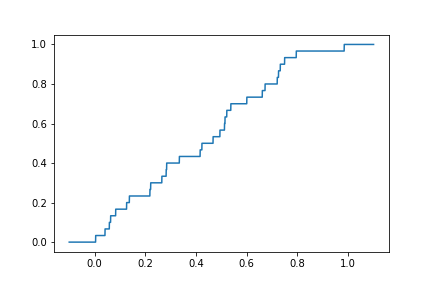

In [37]:
y = lambda x: EmpericFunc(x)
fig = plt.subplots()

x = np.linspace(-0.1, 1.1,10000)
%matplotlib widget
plt.plot(x, y(x))
plt.show()

##Гистограмма

(array([1.16666667, 1.        , 1.5       , 1.16666667, 0.16666667]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

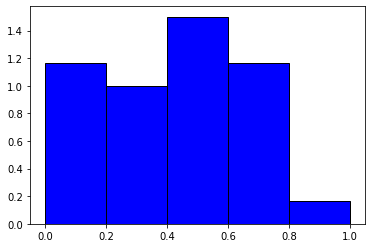

In [27]:
 
plt.hist(data, range = (0, 1), color = 'blue', edgecolor = 'black', bins = int(math.log2(30) + 1), density = 1)

##Критерий Колмогорова

$D_n = sup|F_n^*(x) - F(x)|$

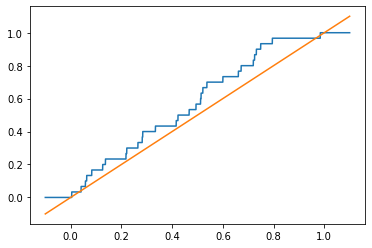

In [28]:
z = lambda x: x

plt.plot(x, y(x))
plt.plot(x, z(x))
plt.show()

In [29]:
point = 0
d = 0

for x in data:
  if (abs(y(x) - z(x)) > d):
    d = abs(y(x) - z(x))
    point = x  

print("D_n = ", d)
print("достигается в точке ", point)

D_n =  0.18433333333333324
достигается в точке  0.749


$P(\sqrt{n} D_n < q) ≃ 𝒦(q) = 1 - 𝛆$

In [30]:
eps = 0.02
q = kstwobign.ppf(1 - eps) 
n = 30

if (math.sqrt(n) * d < q):
  print("Гипотеза верна")
else:
  print("Гипотеза не верна")    

Гипотеза верна


##Критерий хи-квадрат


$𝛹_n = \sum_{i = 1}^{k} \frac{(ν_i - np_i)^2}{np_i}$

$P(𝛹_n < y) → χ^2_{k-1}(y),  n → ∞$

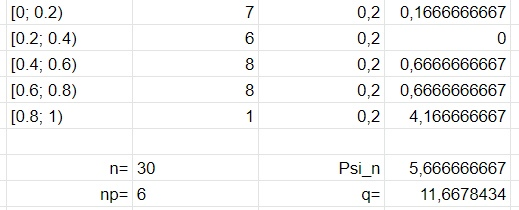

Как видно из полученных данных $𝛹_n = 5.667 < 11.667 = q$

Значит гипотезу принимаем

#Третье задание


In [31]:
data1 = [-1.439, -1.609, -3.889, -1.735, -3.096, 0.023, -1.414, -2.312, -2.648, -2.038,
        -2.631, -2.233, -1.908, -2.356, -2.107, -2.949, -3.048, -2.019, -1.652, -2.285]

data2 = [-2.446, -1.752, -1.990, -1.689, -1.552, -1.916, -2.036, -1.888, -0.726, -2.874,
        -1.426, -1.432, -1.419, -2.090, -2.698, -2.494, -2.544, -2.825, -2.951, -1.814,
        -3.014, -2.542, -2.912, -2.291, -2.103, -1.966, -0.769, -2.474, -1.987, -1.459]

##a)о совпадении дисперсий


In [32]:
mean1 = np.array(data1).mean()
mean2 = np.array(data2).mean()
S1_2 = ((data1 - mean1)**2).mean()
S2_2 = ((data2 - mean2)**2).mean()

$\frac{nS^2_1}{σ^2_1}$ ~ $ χ^2_{n-1}$

$\frac{mS^2_2}{σ^2_2}$ ~ $ χ^2_{m-1}$

Эти случайные величины независимы, значит из них можно построить случайную величину, имеющую распределение Фишера

$\frac {1}{n-1} \frac{nS^2_1}{σ^2_1} : \frac {1}{m-1} \frac{mS^2_2}{σ^2_2} = \frac{n(m-1)\sigma^2_2 S^2_1}{m(n-1)\sigma^2_1 S^2_2}$ ~ $F_{n-1, m-1}$

$\eta = \frac{n(m-1)\ S^2_1}{m(n-1)\ S^2_2}$ ~ $F_{n-1, m-1}$

$P(q_1 < η < q_2) = 1 - 𝛆$

$F_{n-1, m-1}(q_1) = \frac{𝛆}{2}$

$F_{n-1, m-1}(q_2) = 1 - \frac{𝛆}{2}$

In [33]:
n = 20
m = 30
epsilon = 0.02
q1 = f.ppf(eps/2, n - 1, m - 1)
q2 = f.ppf(1 - eps/2, n - 1, m - 1)
eta = (n * (m - 1) * S1_2) / (m * (n - 1) * S2_2)

if (q1 < eta < q2):
  print("Гипотеза верна")
else:
  print("Гипотеза не верна")   

Гипотеза верна


##б)о совпадении средних, если известно, что дисперсии совпадают

$\bar{X}$ ~ $N(α_1, \frac{\sigma^2}{n})$ 

$\bar{Y}$ ~ $N(α_2, \frac{\sigma^2}{m})$

$\bar{X} - \bar{Y}$ ~ $N(α_1 - α_2, \sigma^2(\frac{1}{n} + \frac{1}{m}))$

$\frac{\bar{X} - \bar{Y} - (α1 - α2)}{\sqrt{\sigma^2(\frac{1}{n} + \frac{1}{m})}}$ ~ $N(0, 1)$

$\frac{nS^2_1}{σ^2}$ ~ $ χ^2_{n-1}$

$\frac{mS^2_2}{σ^2}$ ~ $ χ^2_{m-1}$

$\frac{nS^2_1}{σ^2} + \frac{mS^2_2}{σ^2}$ ~ $χ^2_{n + m - 2}$

$\frac{\bar{X} - \bar{Y} - (α1 - α2)}{\sqrt{\sigma^2(\frac{1}{n} + \frac{1}{m})}}$ : $\sqrt{\frac{1}{n + m - 2} \frac{nS^2_1 + mS^2_2}{σ^2}}$ ~ $T_{n + m - 2}$

$ψ$ = $\frac{\bar{X} - \bar{Y}}{\sqrt{\frac{1}{n} + \frac{1}{m}} \sqrt{\frac{nS_1^2 + mS_2^2}{n + m - 2}}}$ ~ $T_{n + m - 2}$

$P(-q < ψ < q) = T_{n + m - 2}(q) - T_{n + m - 2}(-q) = 1 - \frac{𝛆}{2} - \frac{𝛆}{2} = 1 - 𝛆$

In [34]:
eps = 0.02
n = 20
m = 30
q = t.ppf(1 - eps / 2, n + m - 2)  
psi = (mean1 - mean2) / ((math.sqrt(1/n + 1/m)) * (math.sqrt((n * S1_2 + m * S2_2) / (n + m - 2))))

if (-q < psi < q):
  print("Гипотеза верна")
else:
  print("Гипотеза не верна")  

Гипотеза верна
